ECE4200 - MiniProject (PCA + Random Forest)

Name: Yiyan Peng

NetID: yp449

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Load data

In [3]:
data = np.load('/Users/harrypeng/Desktop/ECE4200/Cornell_ML_MiniProject/data.npz')
X_train = data['X_train']   # (82875, 28*28) => (82875, 784)
y_train = data['y_train']   # (82875,)
X_test = data['X_test']     # (14625, 784)

In [4]:
# print("X_train:", np.shape(X_train))
# print("y_train:", np.shape(y_train))
# print("X_test:", np.shape(X_test))

Data Visualization

(28, 28)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  21.  51.  51. 152. 152. 254. 253.
  254. 213. 152.  51.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  21. 203. 253. 252. 253. 252. 253. 252.
  253. 252. 253. 232.  82.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  21. 203. 254. 253. 254. 253. 244. 203.
  203. 223. 254. 253. 214.  10.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.  20. 112. 151. 151.  70.  40.   0.
    0.  20. 213. 252. 253.  50.   0.   0.   0.   

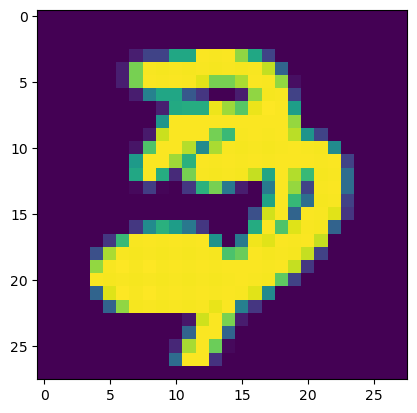

In [5]:
img = X_train[2,:].reshape(28,28)
print(np.shape(img))
print(img)
plt.imshow(img)

In [12]:
# rescale data
X_train = X_train / 255
X_test = X_test / 255

In [13]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Initialize PCA and Random Forest Classifier
pca = PCA(n_components=0.95)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline
pipeline = make_pipeline(StandardScaler(), pca, rf_classifier)

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipeline.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


Training Accuracy: 100.00%


In [1]:
# Predict on the test set
y_test_pred = pipeline.predict(X_test)

# The 'y_test_pred' array now contains predictions with indices starting from 0
print(np.array(y_test_pred))
print(np.shape(y_test_pred))

NameError: name 'pipeline' is not defined

In [21]:
predict_id = np.arange(0, len(X_test))
submission_predictions = np.vstack((predict_id, y_test_pred)).T

In [23]:
# save the predictions to a file:
np.savetxt("predictions.csv", submission_predictions, delimiter=",", header="ID, Label",fmt='%d')
